In [1]:
import glob 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

dic = pd.read_csv("./caged/legenda.txt",delimiter=';', encoding='utf-8')

In [2]:
def arrumaDb(db,leg):
    listaNomesDb = []
    listaNomesLeg = []
    dic = {}
    listaCodFica= []
    for x in range(len(leg["codmunicípio"])):
        listaCodFica.append(leg["codmunicípio"][x])
    db = db.where((db["município"]).isin(listaCodFica)).dropna()
    db = db.drop(columns=['região','uf','subclasse','saldomovimentação','cbo2002ocupação','categoria','tipoestabelecimento','tipodedeficiência','indtrabintermitente','horascontratuais','tamestabjan','indicadoraprendiz','fonte','competência','indtrabparcial'])
    
    for name in leg.columns:
        listaNomesLeg.append(name)
    
    for name in db.columns:
        listaNomesDb.append(name)
    
    for k in range(0,len(leg.columns),2):
        dic = {}
        for i in range(len(leg)):
            if (leg.notna()[listaNomesLeg[k]][i]):
                dic[leg[listaNomesLeg[k]][i]]=leg[listaNomesLeg[k+1]][i]
        try:
            db[listaNomesLeg[k+1]]=db[listaNomesLeg[k+1]].map(dic)
        except:
            print(sys.exc_info()[0])
     
    return db

In [3]:
jan2020 = pd.read_csv("./caged/CAGEDMOV202001.txt",delimiter=';', encoding='utf-8')
jan2020 = arrumaDb(jan2020, dic)
print("jan2020 carregado")
fev2020 = pd.read_csv("./caged/CAGEDMOV202002.txt",delimiter=';', encoding='utf-8')
fev2020 = arrumaDb(fev2020, dic)
print("fev2020 carregado")
mar2020 = pd.read_csv("./caged/CAGEDMOV202003.txt",delimiter=';', encoding='utf-8')
mar2020 = arrumaDb(mar2020, dic)
print("mar2020 carregado")
abr2020 = pd.read_csv("./caged/CAGEDMOV202004.txt",delimiter=';', encoding='utf-8')
abr2020 = arrumaDb(abr2020, dic)
print("abr2020 carregado")
mai2020 = pd.read_csv("./caged/CAGEDMOV202005.txt",delimiter=';', encoding='utf-8')
mai2020 = arrumaDb(mai2020, dic)
print("mai2020 carregado")
jun2020 = pd.read_csv("./caged/CAGEDMOV202006.txt",delimiter=';', encoding='utf-8')
jun2020 = arrumaDb(jun2020, dic)
print("jun2020 carregado")
jul2020 = pd.read_csv("./caged/CAGEDMOV202007.txt",delimiter=';', encoding='utf-8')
jul2020 = arrumaDb(jul2020, dic)
print("jul2020 carregado")
ago2020 = pd.read_csv("./caged/CAGEDMOV202008.txt",delimiter=';', encoding='utf-8')
ago2020 = arrumaDb(ago2020, dic)
print("ago2020 carregado")
set2020 = pd.read_csv("./caged/CAGEDMOV202009.txt",delimiter=';', encoding='utf-8')
set2020 = arrumaDb(set2020, dic)
print("set2020 carregado")
out2020 = pd.read_csv("./caged/CAGEDMOV202010.txt",delimiter=';', encoding='utf-8')
out2020 = arrumaDb(out2020, dic)
print("out2020 carregado")
nov2020 = pd.read_csv("./caged/CAGEDMOV202011.txt",delimiter=';', encoding='utf-8')
nov2020 = arrumaDb(nov2020, dic)
print("nov2020 carregado")
dez2020 = pd.read_csv("./caged/CAGEDMOV202012.txt",delimiter=';', encoding='utf-8')
dez2020 = arrumaDb(dez2020, dic)
print("dez2020 carregado")

jan2020 carregado
fev2020 carregado
mar2020 carregado
abr2020 carregado
mai2020 carregado
jun2020 carregado
jul2020 carregado
ago2020 carregado
set2020 carregado
out2020 carregado
nov2020 carregado
dez2020 carregado


In [4]:
admiJan = jan2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslJan = jan2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiFev = fev2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslFev = fev2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiMar = mar2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslMar = mar2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiAbr = abr2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslAbr = abr2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiMai = mai2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslMai = mai2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiJun = jun2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslJun = jun2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiJul = jul2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslJul = jul2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiAgo = ago2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslAgo = ago2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiSet = set2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslSet = set2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiOut = out2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslOut = out2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiNov = nov2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslNov = nov2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiDez = dez2020.query('tipomovimentação=="Admissão"')['tipomovimentação'].count()
deslDez = dez2020.query('tipomovimentação=="Desligamento"')['tipomovimentação'].count()

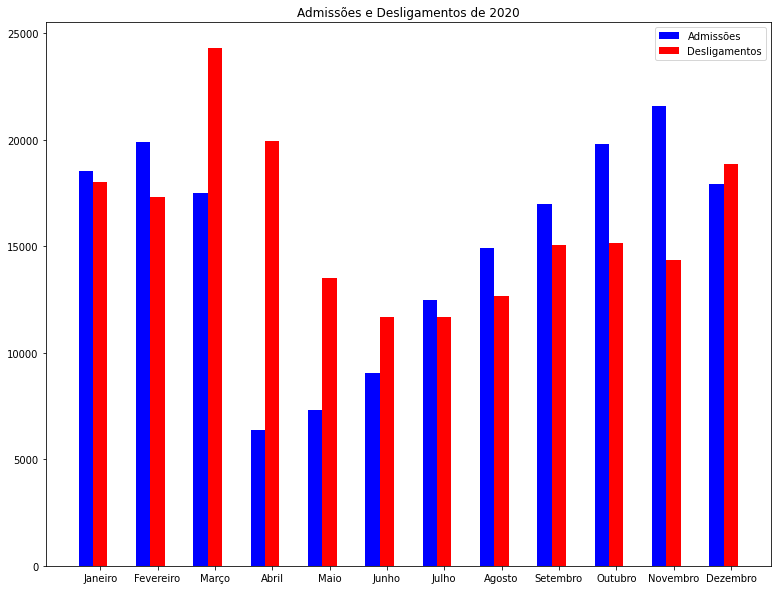

In [12]:
fig, (tx1) = plt.subplots(figsize=(13,10))
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

# Quantidade de Admitidos
admi = [admiJan,admiFev,admiMar,admiAbr,admiMai,admiJun,admiJul,admiAgo,admiSet,admiOut,admiNov,admiDez]

# Quantidade de Desligamentos
desl = [deslJan,deslFev,deslMar,deslAbr,deslMai,deslJun,deslJul,deslAgo,deslSet,deslOut,deslNov,deslDez]


# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(admi))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, admi, width=0.25, label = 'Admissões', color = 'blue')
plt.bar(x2, desl, width=0.25, label = 'Desligamentos', color = 'red')

# coloca o nome dos meses como label do eixo x
plt.xticks([x + 0.25 for x in range(len(admi))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Admissões e Desligamentos de 2020")
plt.show()

In [6]:
admiJanH = jan2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslJanH = jan2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiJanM = jan2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslJanM = jan2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiFevH = fev2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslFevH = fev2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiFevM = fev2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslFevM = fev2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiMarH = mar2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslMarH = mar2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiMarM = mar2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslMarM = mar2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiAbrH = abr2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslAbrH = abr2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiAbrM = abr2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslAbrM = abr2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiMaiH = mai2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslMaiH = mai2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiMaiM = mai2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslMaiM = mai2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiJunH = jun2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslJunH = jun2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiJunM = jun2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslJunM = jun2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiJulH = jul2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslJulH = jul2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiJulM = jul2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslJulM = jul2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiAgoH = ago2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslAgoH = ago2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiAgoM = ago2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslAgoM = ago2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiSetH = set2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslSetH = set2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiSetM = set2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslSetM = set2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiOutH = out2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslOutH = out2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiOutM = out2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslOutM = out2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiNovH = nov2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslNovH = nov2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiNovM = nov2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslNovM = nov2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()
#----------------------------------------------------------------------------------------
admiDezH = dez2020.query('tipomovimentação=="Admissão" and sexo == "Homem"')['tipomovimentação'].count()
deslDezH = dez2020.query('tipomovimentação=="Desligamento" and sexo == "Homem"')['tipomovimentação'].count()
admiDezM = dez2020.query('tipomovimentação=="Admissão" and sexo == "Mulher"')['tipomovimentação'].count()
deslDezM = dez2020.query('tipomovimentação=="Desligamento" and sexo == "Mulher"')['tipomovimentação'].count()

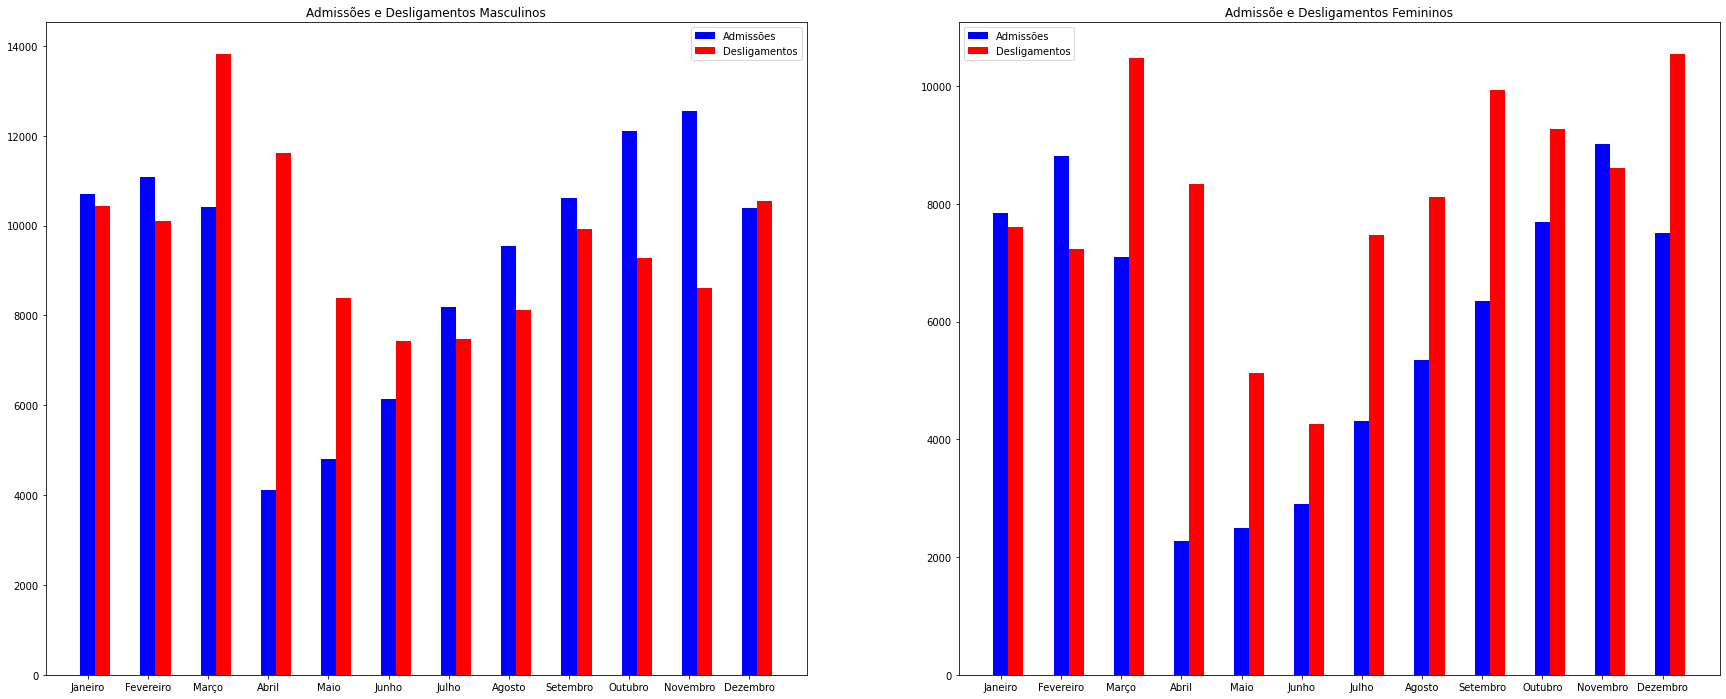

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,12))

# Quantidade de Admitidos e Desligados H
admiH = [admiJanH,admiFevH,admiMarH,admiAbrH,admiMaiH,admiJunH,admiJulH,admiAgoH,admiSetH,admiOutH,admiNovH,admiDezH]
deslH = [deslJanH,deslFevH,deslMarH,deslAbrH,deslMaiH,deslJunH,deslJulH,deslAgoH,deslSetH,deslOutH,deslNovH,deslDezH]

# Quantidade de Admitidos e Desligamentos M
admiM = [admiJanM,admiFevM,admiMarM,admiAbrM,admiMaiM,admiJunM,admiJulM,admiAgoM,admiSetM,admiOutM,admiNovM,admiDezM]
deslM = [deslJanM,deslFevM,deslMarM,deslAbrM,deslMaiM,deslJunM,deslJulH,deslAgoH,deslSetH,deslOutH,deslNovH,deslDezH]


# Cria eixo x para x1 e x2 com uma separação de 0.25 entre as barras
x1H = np.arange(len(admiH))
x2H = [x + 0.25 for x in x1H]
x1M = np.arange(len(admiM))
x2M = [x + 0.25 for x in x1M]

# Plota as barras
ax1.bar(meses, admiH, width=0.25, label = 'Admissões', color = 'blue')
ax1.bar(x2H, deslH, width=0.25, label = 'Desligamentos', color = 'red')

ax2.bar(meses, admiM, width=0.25, label = 'Admissões', color = 'blue')
ax2.bar(x2M, deslM, width=0.25, label = 'Desligamentos', color = 'red')

# inseri uma legenda no gráfico
ax1.legend()
ax2.legend()

ax1.set(title="Admissões e Desligamentos Masculinos")
ax2.set(title="Admissõe e Desligamentos Femininos")
plt.show()

In [46]:
jun2020.query('tipomovimentação =="Admissão" and tipoempregador =="CPF"').sort_values('salário')

,município,seção,graudeinstrução,idade,raçacor,sexo,tipoempregador,tipomovimentação,salário
1775717,Sp-Taubate,Saúde Humana e Serviços Sociais,Médio Completo,34.0,Parda,Mulher,CPF,Admissão,1184.380005
862145,Sp-Taubate,Saúde Humana e Serviços Sociais,Superior Incompleto,24.0,Branca,Mulher,CPF,Admissão,1184.380005
1836588,Sp-Cunha,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,30.0,Preta,Homem,CPF,Admissão,1216.000000
281735,Sp-Guaratingueta,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,43.0,Branca,Homem,CPF,Admissão,1216.000000
1646727,Sp-Guaratingueta,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,57.0,Branca,Mulher,CPF,Admissão,1216.000000
303420,Sp-Guaratingueta,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,69.0,Branca,Homem,CPF,Admissão,1216.000000
1599786,Sp-Guaratingueta,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,43.0,Branca,Homem,CPF,Admissão,1216.000000
327750,Sp-Guaratingueta,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,38.0,Branca,Homem,CPF,Admissão,1216.000000
360420,Sp-Guaratingueta,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,56.0,Branca,Homem,CPF,Admissão,1216.000000
459551,Sp-Guaratingueta,"Agricultura, Pecuária, Produção Florestal, Pes...",Até 5ª Incompleto,63.0,Preta,Mulher,CPF,Admissão,1216.000000
